## Tiền xử lý dữ liệu về dự đoán giá nhà
- Tập tin dữ liệu housing_prices.csv. Tập dữ liệu dự đoán giá nhà (biến SalePrice)
- Mô tả các biến (tập tin housing_prices.txt)
- Đọc dữ liệu và xem thông tin cơ bản. HD: shape, columns, ...
### Yêu cầu:
- Kiểm tra dữ liệu bị trùng
- Xác định các các biến định tính, các biến định lượng
- Chọn ra các biến định lượng có mối tương quan tuyến tính với biến SalePrice
- Chọn ra các biến định tính có sự khác biệt ý nghĩa thống kê về mức trung bình giá nhà giữa các nhóm dữ liệu
- Xử lý dữ liệu bị thiếu
- Thống kê mô tả
- Kiểm tra outlier
- Vẽ biểu đồ phân phối dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu và xem thông tin cơ bản

In [2]:
# Đọc tập tin dữ liệu
housing_prices = pd.read_csv('data/housing_prices.csv')

In [3]:
# Xem thông tin cơ bản
housing_prices.shape

(1460, 81)

In [4]:
housing_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Tiền xử lý dữ liệu

#### Kiểm tra dữ liệu bị trùng

In [5]:
housing_prices.drop(columns=['Id'], inplace=True)

In [6]:
housing_prices.duplicated().any()

False

#### Xác định các thuộc tính

In [7]:
# Các biến định tính
cat_cols = housing_prices.select_dtypes('object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
# Các biến định lượng
num_cols = housing_prices.select_dtypes(include='number').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
for col in cat_cols:
    print(col, ':', housing_prices[col].nunique(), '-', housing_prices[col].unique())

MSZoning : 5 - ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : 2 - ['Pave' 'Grvl']
Alley : 2 - [nan 'Grvl' 'Pave']
LotShape : 4 - ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : 4 - ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : 2 - ['AllPub' 'NoSeWa']
LotConfig : 5 - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : 3 - ['Gtl' 'Mod' 'Sev']
Neighborhood : 25 - ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : 9 - ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : 8 - ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : 5 - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : 8 - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : 6 - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : 8 - ['CompShg' 'WdShngl

In [10]:
for col in num_cols:
    n = housing_prices[col].nunique()
    print(col, ':', n)

MSSubClass : 15
LotFrontage : 110
LotArea : 1073
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
MasVnrArea : 327
BsmtFinSF1 : 637
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
TotRmsAbvGrd : 12
Fireplaces : 4
GarageYrBlt : 97
GarageCars : 5
GarageArea : 441
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76
PoolArea : 8
MiscVal : 21
MoSold : 12
YrSold : 5
SalePrice : 663


In [11]:
# Chọn các biến định lượng
lst = []
for col in num_cols:
    if col!='SalePrice':
        n = housing_prices[[col,'SalePrice']].corr().iloc[0,1]
        if abs(n)>0.5:
            print(col, ':', n)
            lst.append(col)

OverallQual : 0.7909816005838053
YearBuilt : 0.5228973328794967
YearRemodAdd : 0.5071009671113866
TotalBsmtSF : 0.6135805515591943
1stFlrSF : 0.6058521846919153
GrLivArea : 0.7086244776126515
FullBath : 0.5606637627484453
TotRmsAbvGrd : 0.5337231555820284
GarageCars : 0.6404091972583519
GarageArea : 0.6234314389183622


In [12]:
lst.append('SalePrice')
num_cols = lst
num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [13]:
from scipy.stats import f_oneway

In [14]:
# Chọn các biến định tính
lst = []
for col in cat_cols:
    lst_ = []
    for name, g in housing_prices.groupby(col):
        lst_.append(g['SalePrice'])
    # Thực hiện kiểm định ANOVA
    f_statistic, p_value = f_oneway(*lst_)    
    if p_value<0.05:
        print(col, ':', p_value)
        lst.append(col)

MSZoning : 8.817633866272648e-35
Alley : 4.8998261667710666e-08
LotShape : 6.447523852011766e-25
LandContour : 2.7422167521379096e-08
LotConfig : 3.163167473604189e-06
Neighborhood : 1.5586002827707996e-225
Condition1 : 8.904549416138854e-08
Condition2 : 0.043425658360948464
BldgType : 2.0567364604967015e-10
HouseStyle : 3.376776535121222e-25
RoofStyle : 3.653523047099126e-17
RoofMatl : 7.231444779987188e-08
Exterior1st : 2.5860887286376316e-43
Exterior2nd : 4.8421856706985465e-43
MasVnrType : 4.793331178118786e-65
ExterQual : 1.4395510967787893e-204
ExterCond : 5.106680608671862e-07
Foundation : 5.791895002232234e-91
BsmtQual : 9.610615106781709e-186
BsmtCond : 5.136900937703027e-09
BsmtExposure : 1.022670629183227e-42
BsmtFinType1 : 1.8077310066862167e-63
BsmtFinType2 : 0.019410089690234594
Heating : 0.000753472106445497
HeatingQC : 2.6670620921043572e-67
CentralAir : 1.8095061559267854e-22
Electrical : 1.6632487814737638e-18
KitchenQual : 3.0322127528402335e-192
Functional : 0.00048

In [15]:
cat_cols = lst
cat_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [16]:
housing_prices = housing_prices[num_cols+cat_cols]
housing_prices.shape

(1460, 49)

#### Làm sạch dữ liệu

In [17]:
# Xử lý dữ liệu bị thiếu
ser = housing_prices.isnull().sum()
ser_null = ser[ser>0]
ser_null

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [18]:
# Nếu biến số thì thay giá trị bị thiếu bằng median
# Nếu biến phân loại thì thay giá trị bị thiếu bằng mode
for col in ser_null.index:
    if housing_prices[col].dtype=='object':
        housing_prices[col].fillna(housing_prices[col].mode()[0], inplace=True)
    else:
        housing_prices[col].fillna(housing_prices[col].median(), inplace=True)

#### Thống kê mô tả

In [19]:
# Thống kê mô tả các biến số
housing_prices[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0


In [20]:
# Thống kê mô tả các biến phân loại
housing_prices[cat_cols].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Alley,1460,2,Grvl,1419
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445
BldgType,1460,5,1Fam,1220
HouseStyle,1460,8,1Story,726


MSZoning


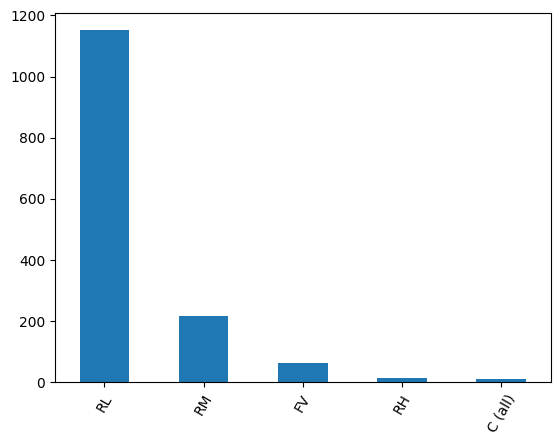

Alley


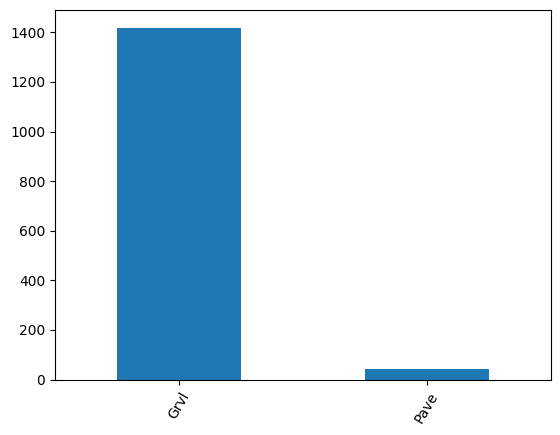

LotShape


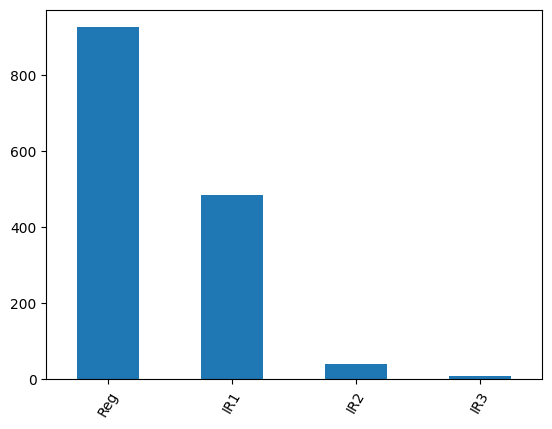

LandContour


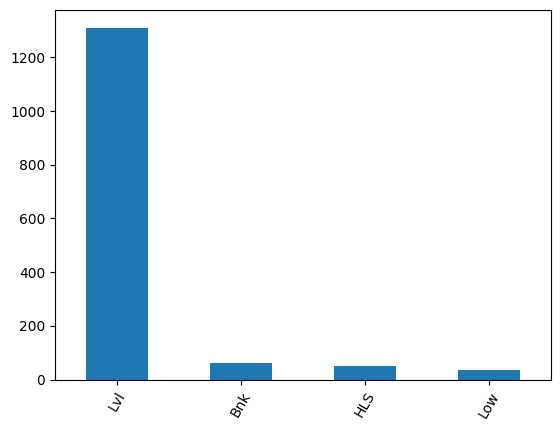

LotConfig


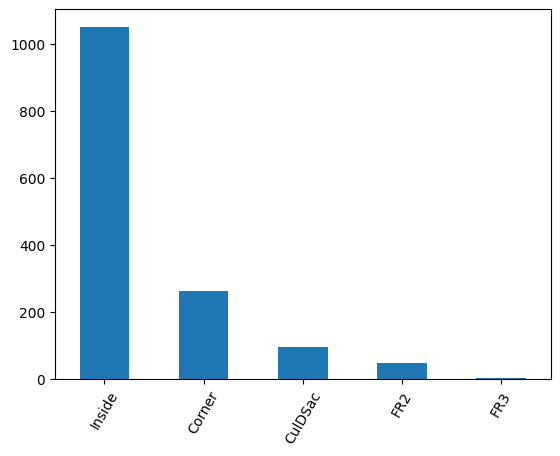

Neighborhood


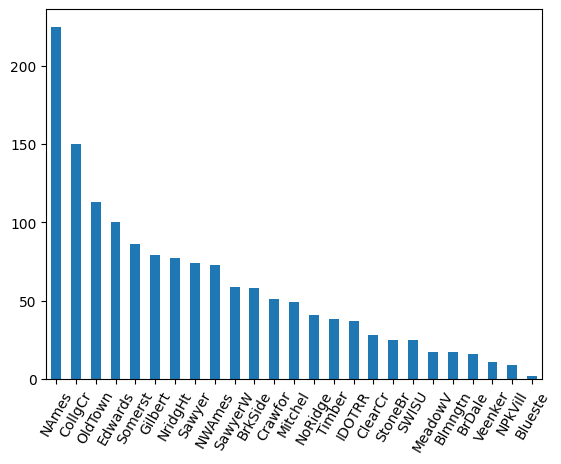

Condition1


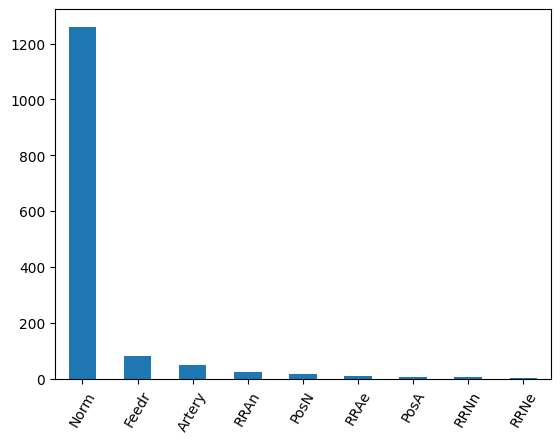

Condition2


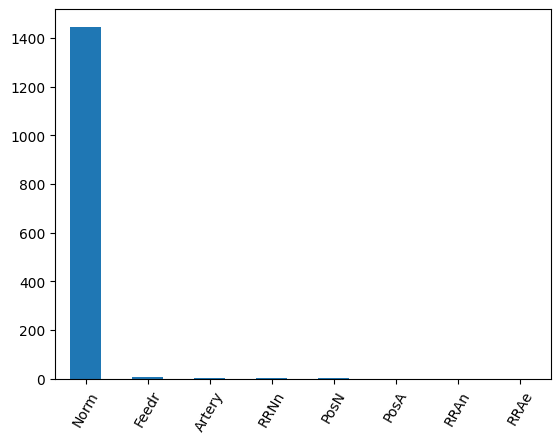

BldgType


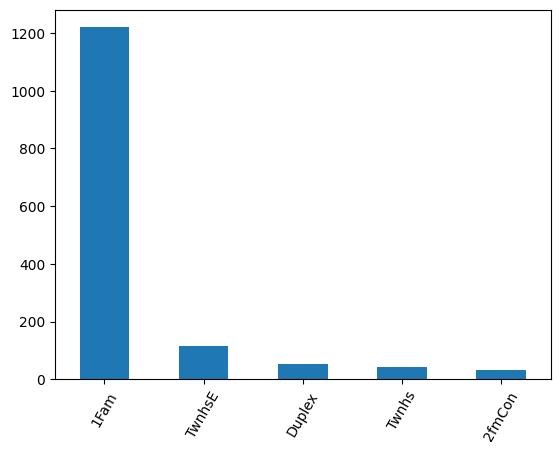

HouseStyle


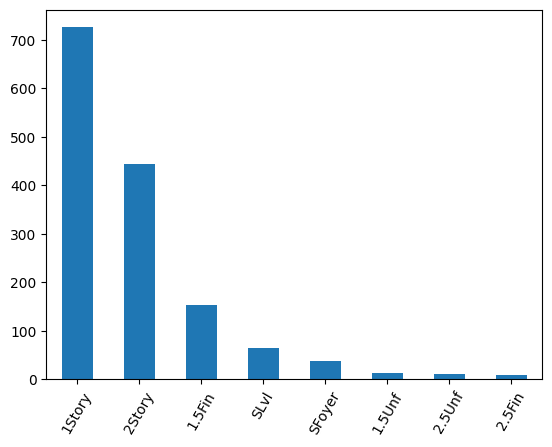

RoofStyle


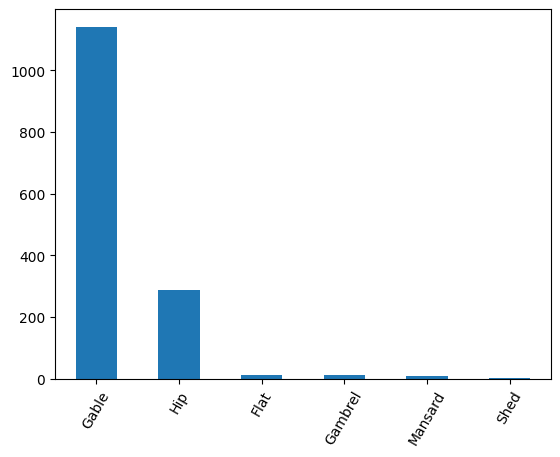

RoofMatl


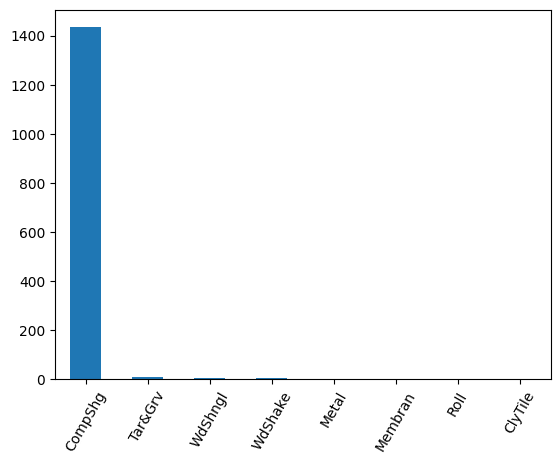

Exterior1st


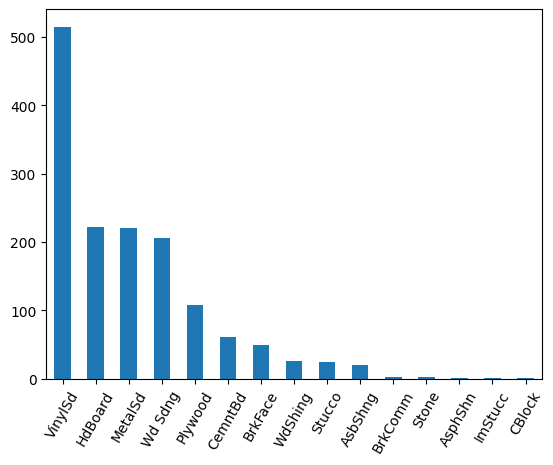

Exterior2nd


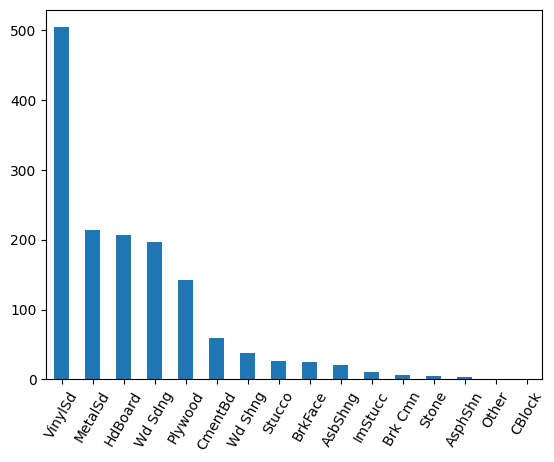

MasVnrType


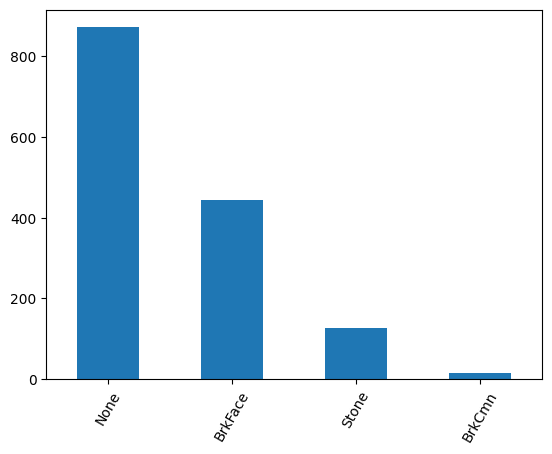

ExterQual


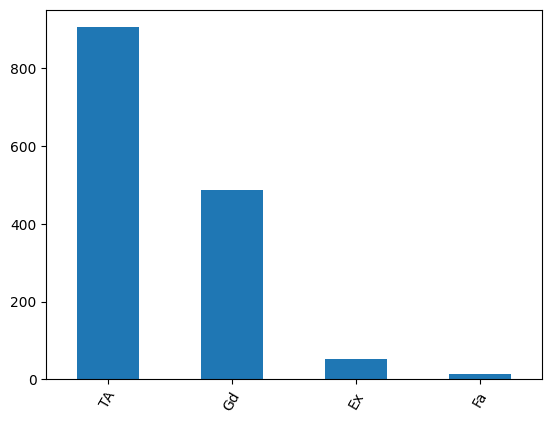

ExterCond


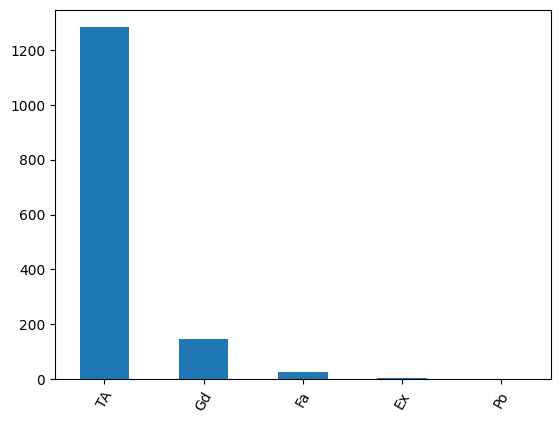

Foundation


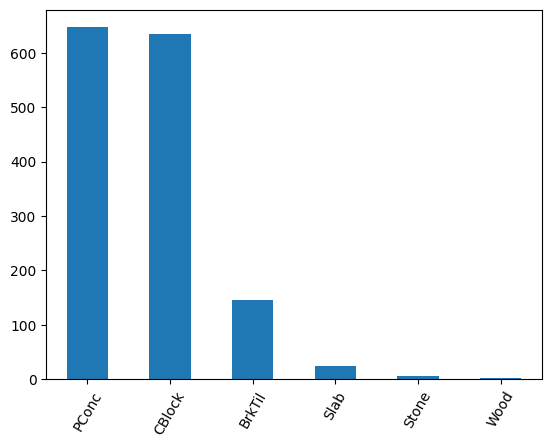

BsmtQual


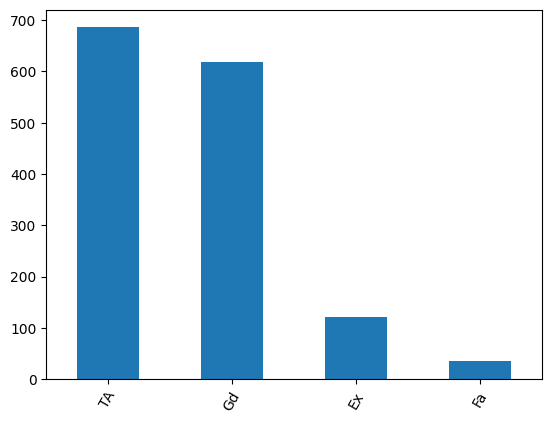

BsmtCond


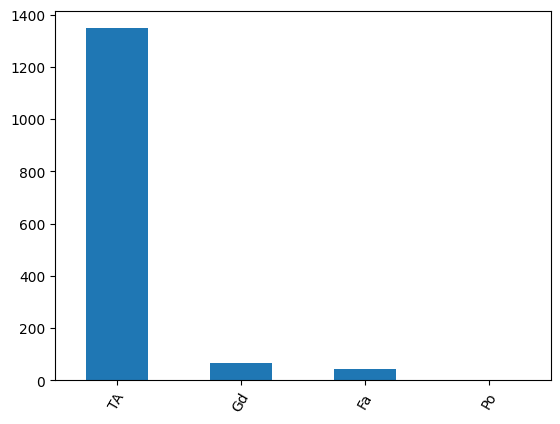

BsmtExposure


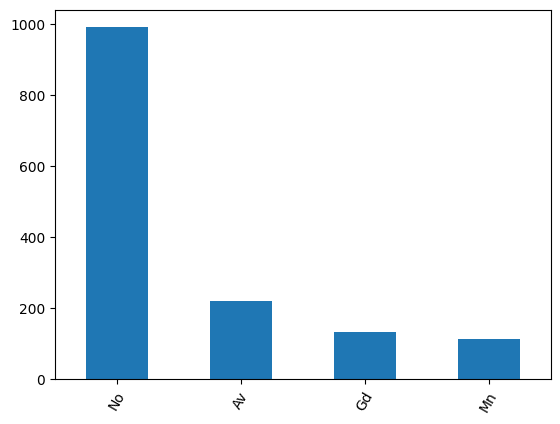

BsmtFinType1


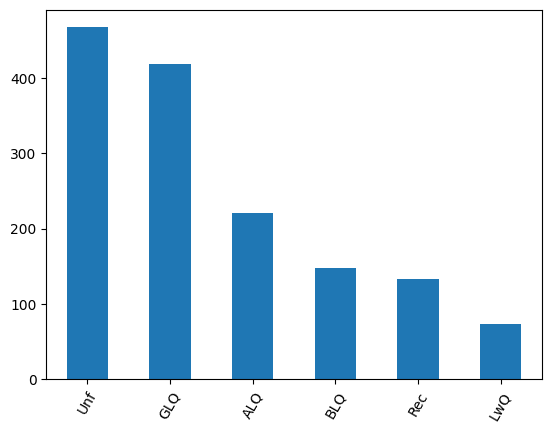

BsmtFinType2


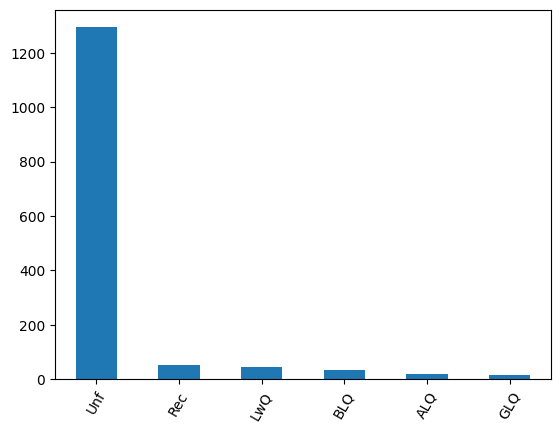

Heating


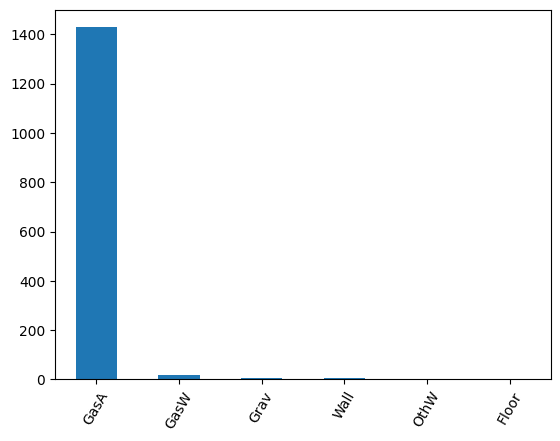

HeatingQC


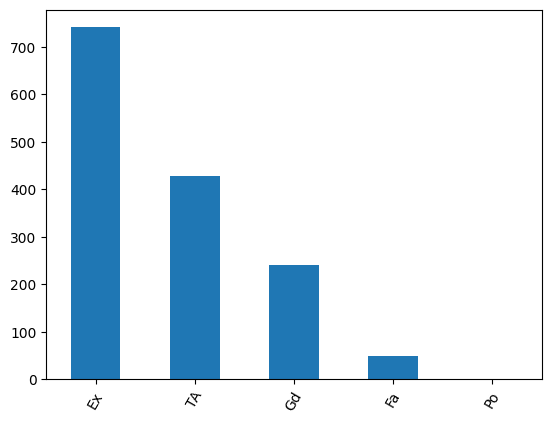

CentralAir


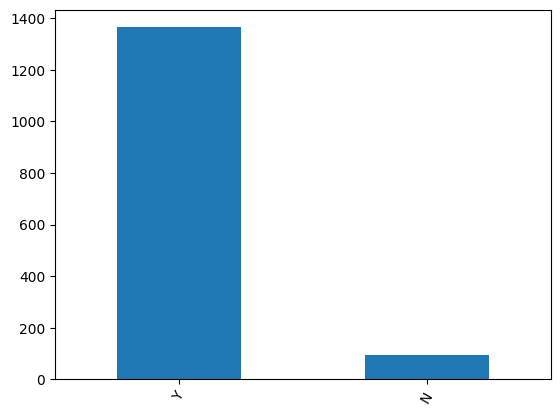

Electrical


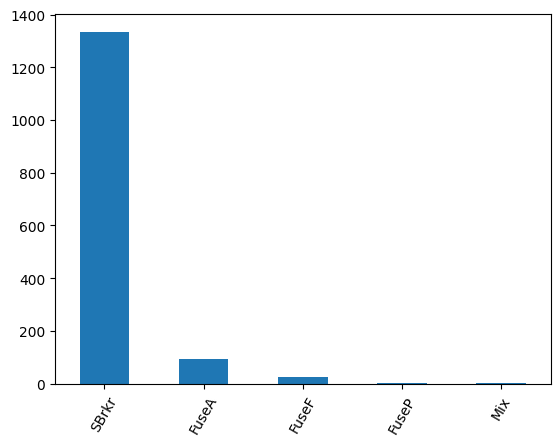

KitchenQual


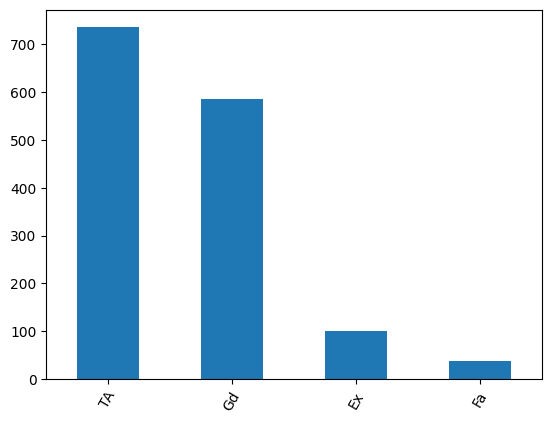

Functional


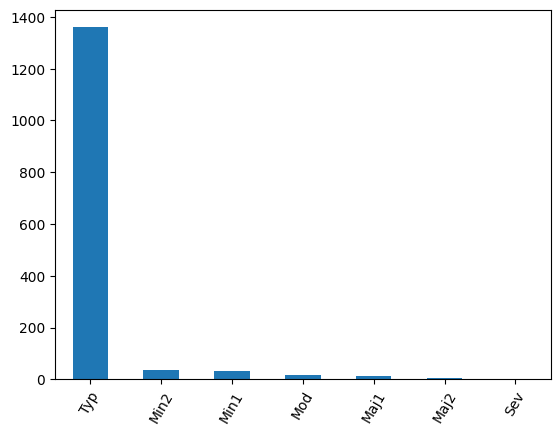

FireplaceQu


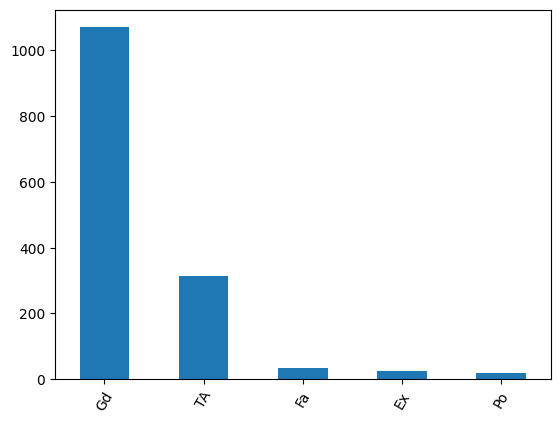

GarageType


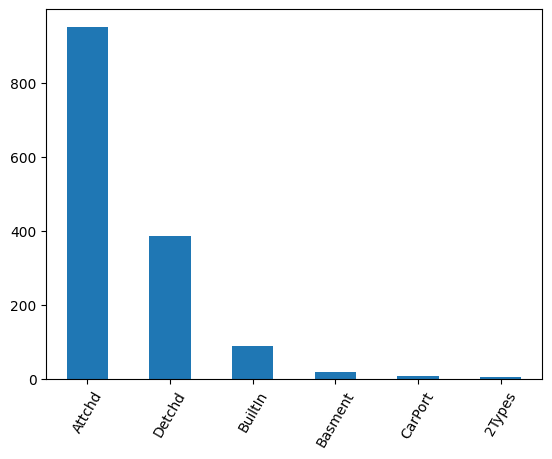

GarageFinish


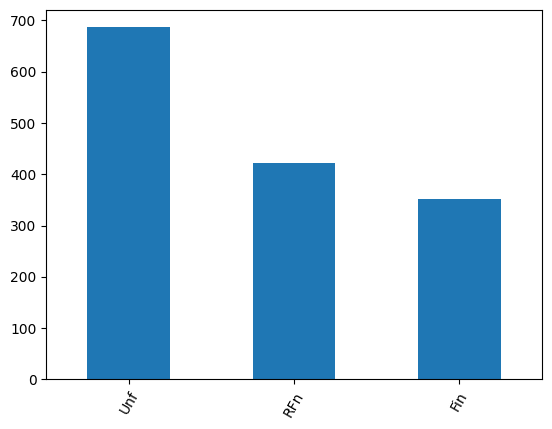

GarageQual


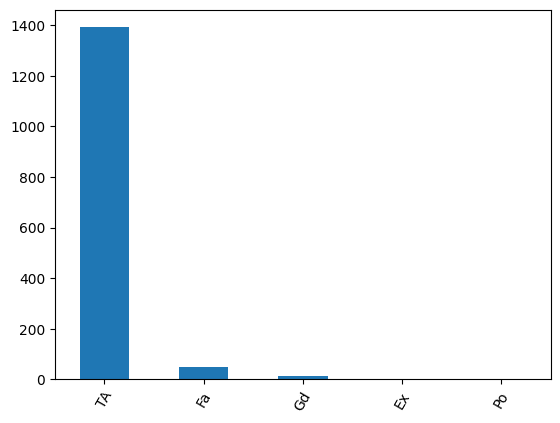

GarageCond


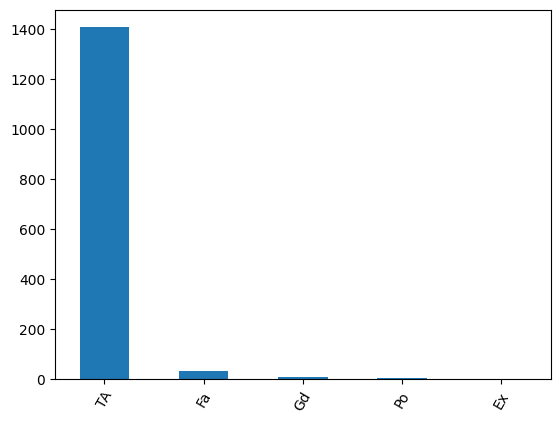

PavedDrive


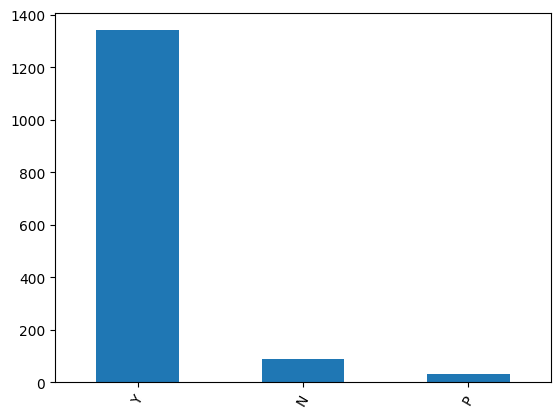

Fence


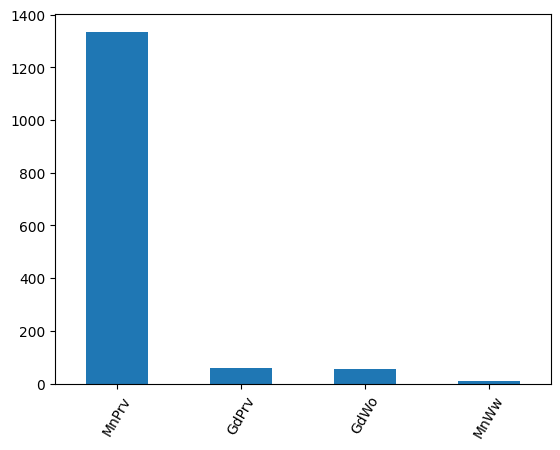

SaleType


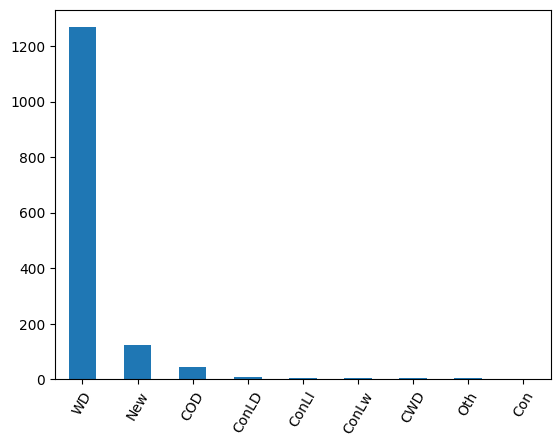

SaleCondition


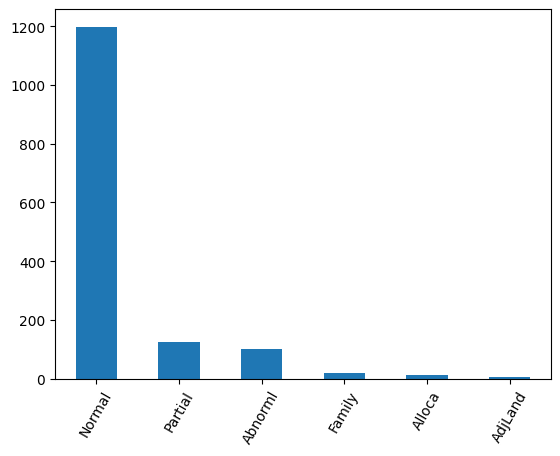

In [21]:
# Thống kê đếm các biến phân loại
for col in cat_cols:
    print(col)
    housing_prices[col].value_counts().plot.bar()
    plt.xticks(rotation=60)
    plt.show()

#### Kiểm tra outlier

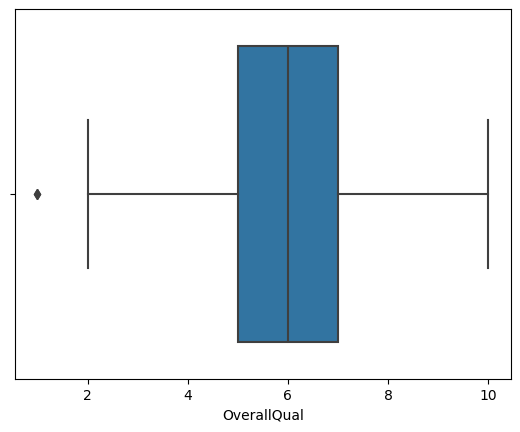

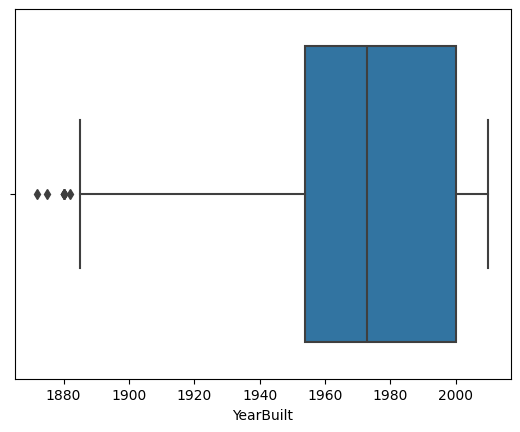

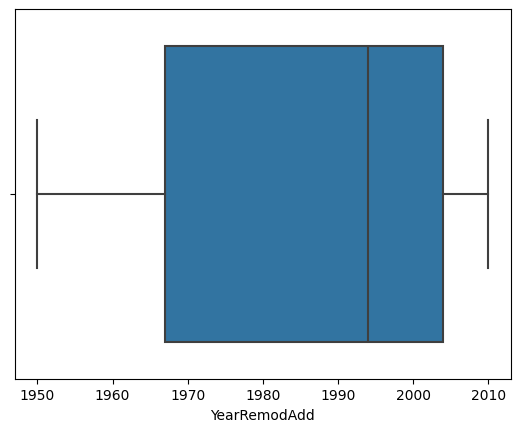

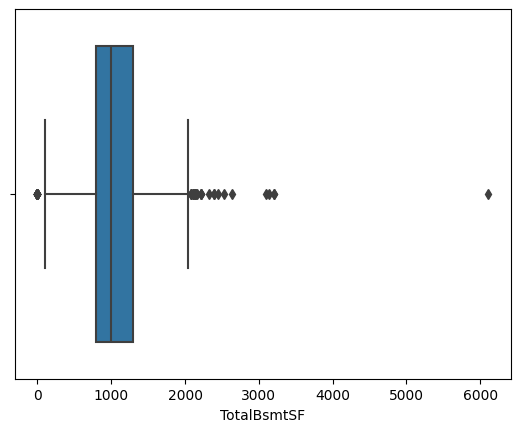

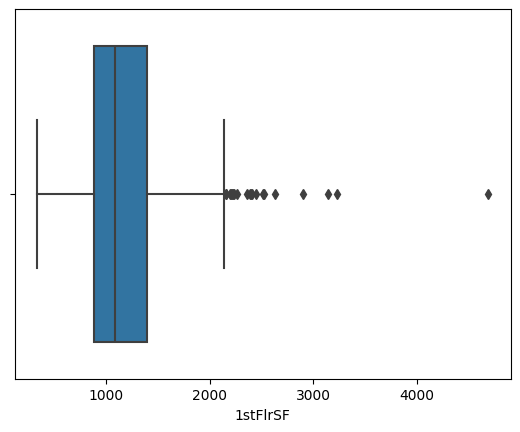

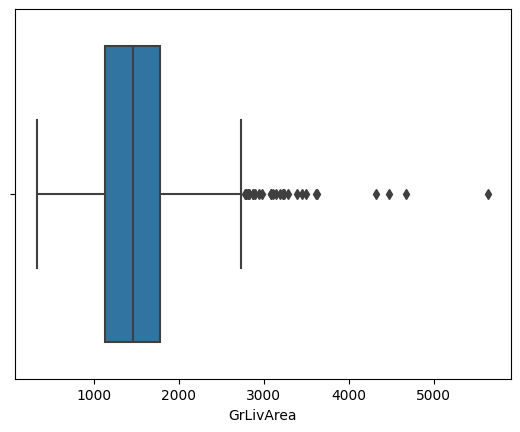

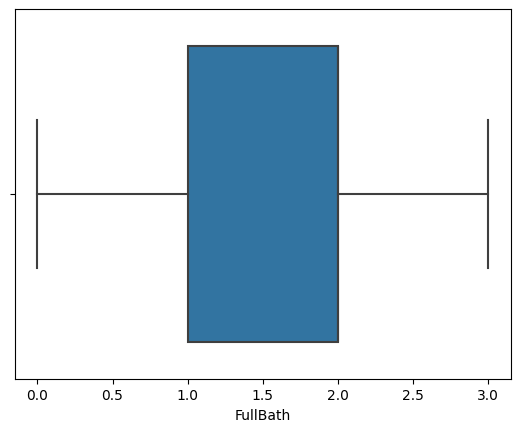

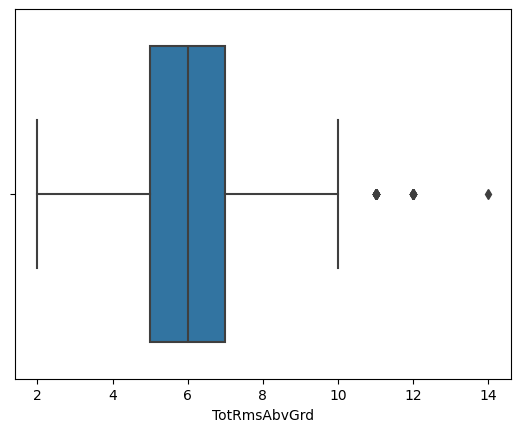

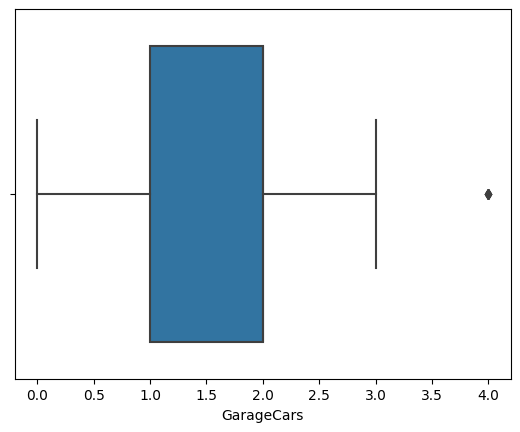

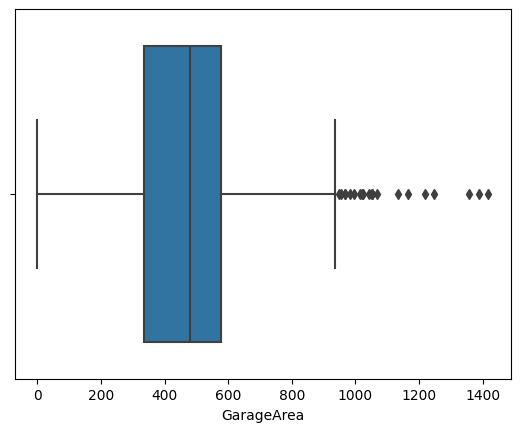

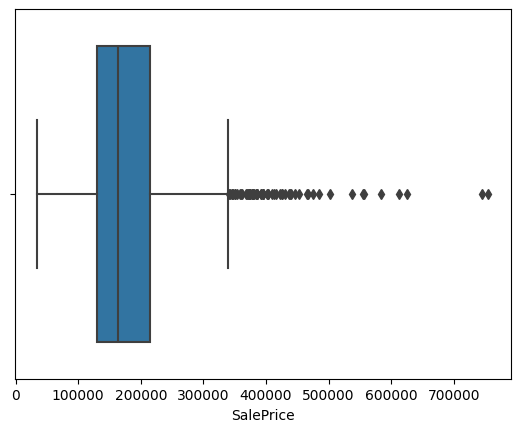

In [22]:
for col in num_cols:
    sns.boxplot(data=housing_prices, x=col)
    plt.show()

#### Xem hình dạng phân phối của dữ liệu

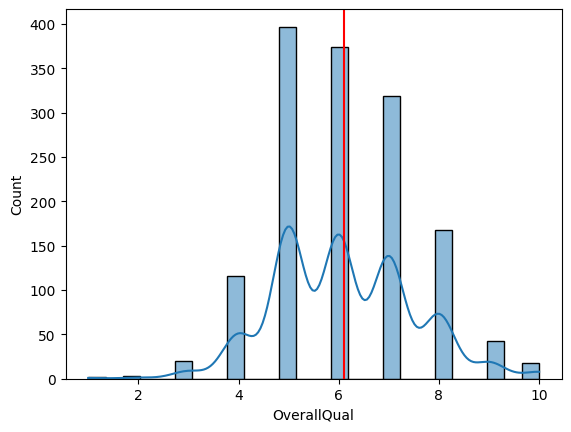

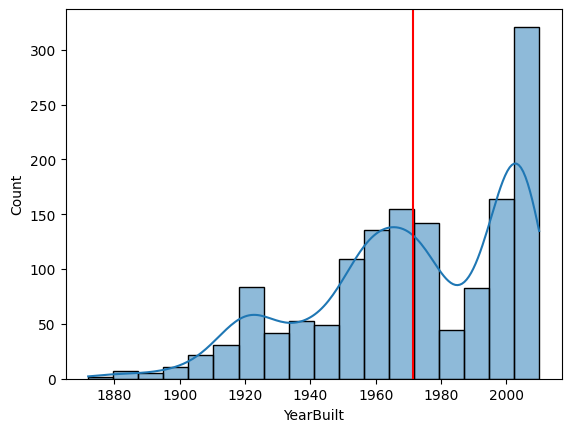

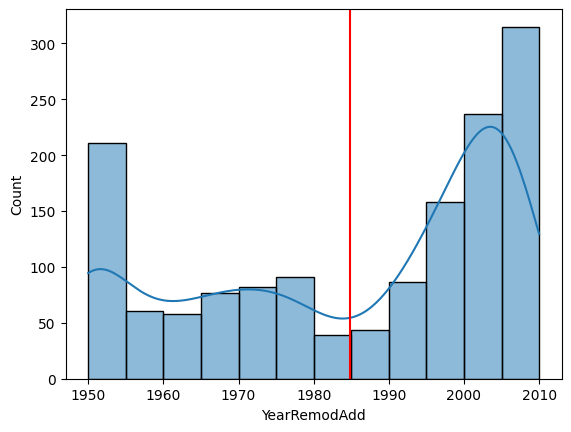

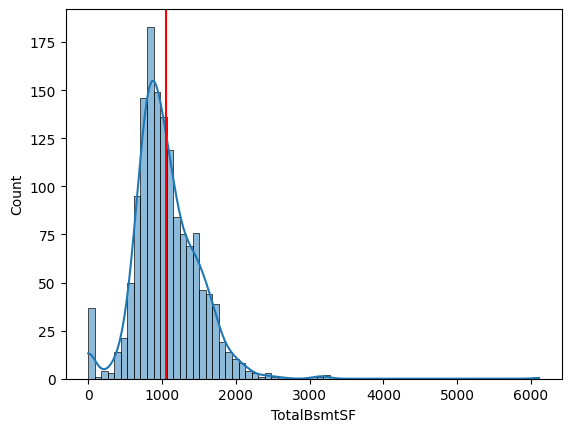

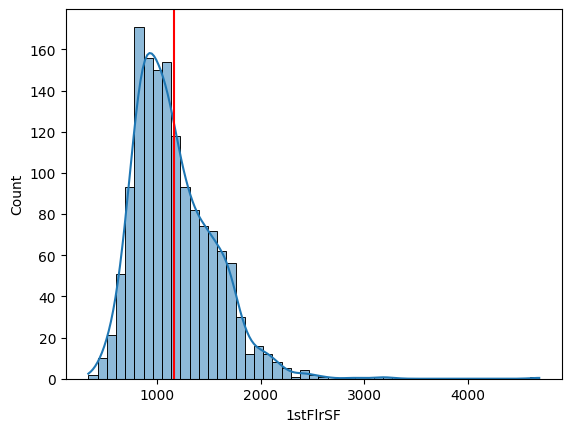

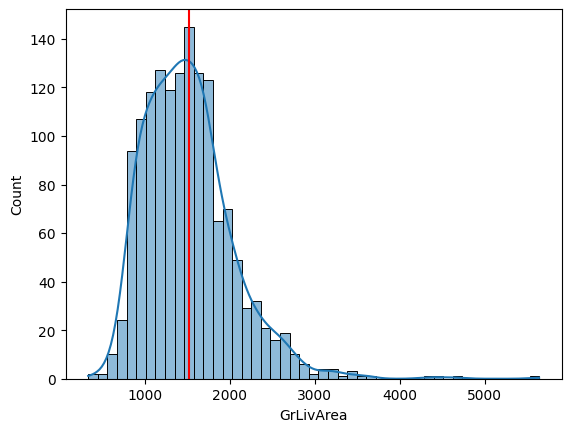

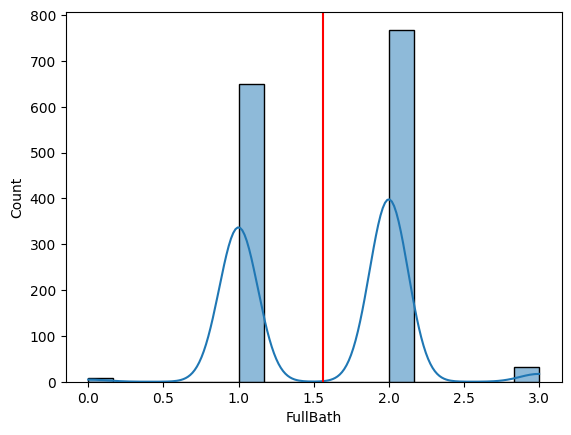

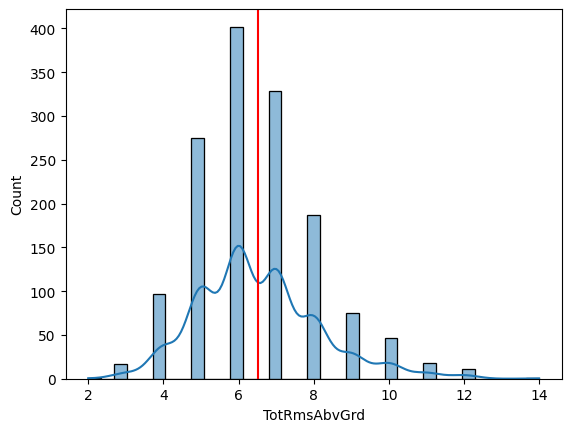

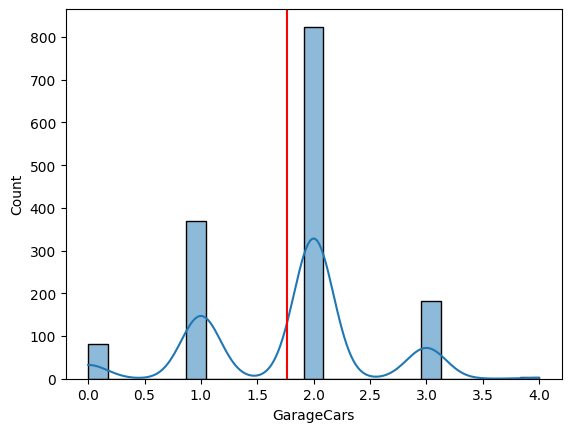

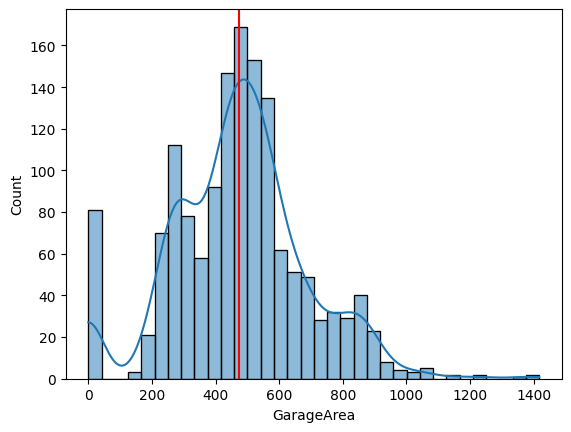

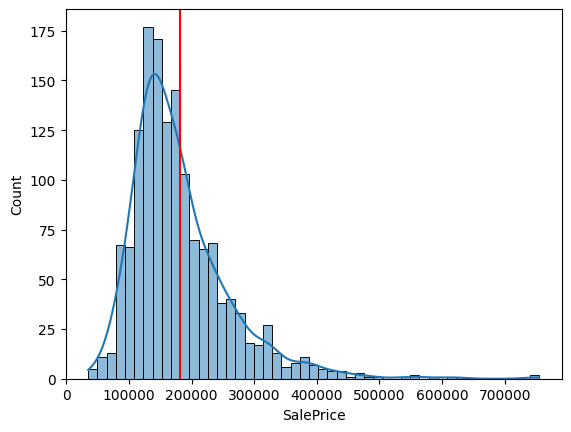

In [23]:
for col in num_cols:
    ax = sns.histplot(data=housing_prices, x=col, kde=True)
    m = housing_prices[col].mean()
    ax.axvline(x = m, ymin = 0, color='r')
    plt.show()